In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
import talib
import pynance as pn
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
ticker = 'GOOG'
df = yf.download(ticker, period='1y')
df.columns = df.columns.get_level_values(0)
print(df.head())

/tmp/ipython-input-2759079189.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='1y')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Date                                                                
2024-11-22  165.844177  167.531783  164.987924  166.431603  24497000
2024-11-25  168.691681  169.717207  166.670528  167.257969  21395700
2024-11-26  169.876495  170.747682  168.691679  168.751430  14937500
2024-11-27  170.075638  170.394235  168.930640  169.936233  12433400
2024-11-29  169.747070  170.125404  168.014647  169.318936   9250700


In [21]:
close_prices = df['Close'].values

df['SMA_20'] = talib.SMA(close_prices, timeperiod=20)
df['SMA_50'] = talib.SMA(close_prices, timeperiod=50)
df['RSI'] = talib.RSI(close_prices, timeperiod=14)

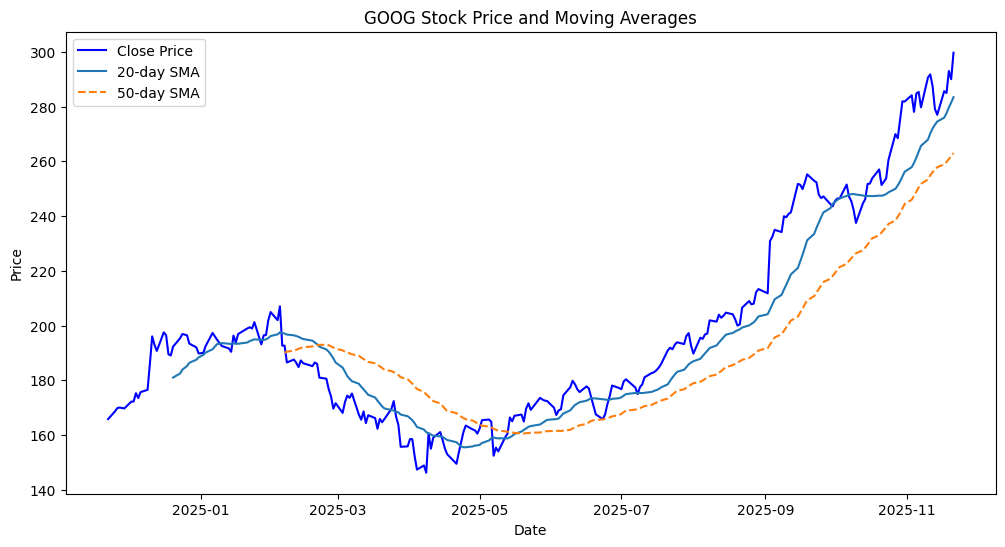

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Close'], label='Close Price', color='blue')
ax.plot(df.index, df['SMA_20'], label='20-day SMA', linestyle='-')
ax.plot(df.index, df['SMA_50'], label='50-day SMA', linestyle='--')
ax.set_title(f'{ticker} Stock Price and Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [23]:
MACD_line, signal_line, hist = talib.MACD(close_prices, 12, 26, 9)
df["MACD_line"] = MACD_line
df["signal_line"] = signal_line
df["hist"] = hist

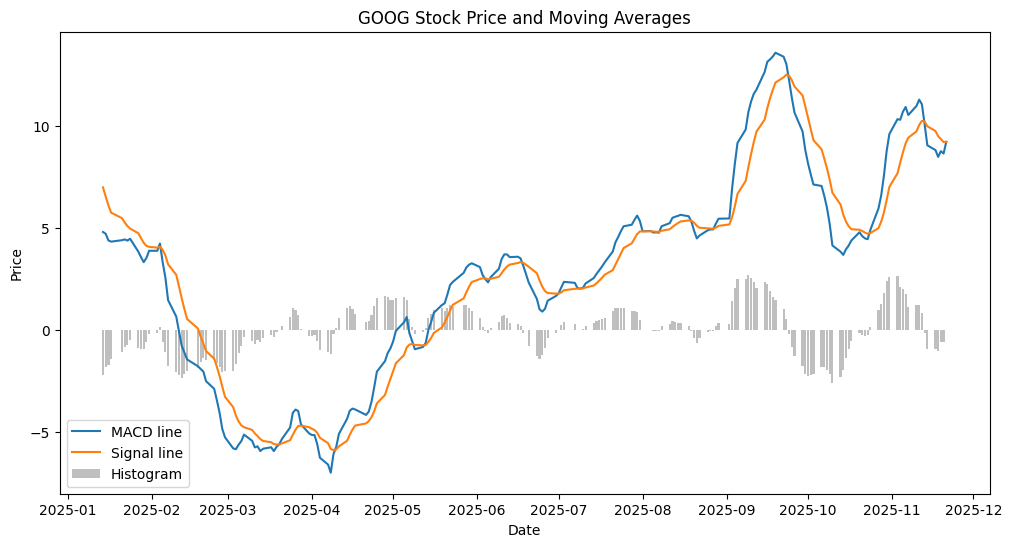

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['MACD_line'], label="MACD line")
ax.plot(df.index, df['signal_line'], label='Signal line')
ax.bar(df.index, df['hist'], label='Histogram', color='gray', alpha=0.5)

ax.set_title(f'{ticker} Stock Price and Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()